In [1]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [2]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 4s 0us/step


(28, 28)
60000
10000


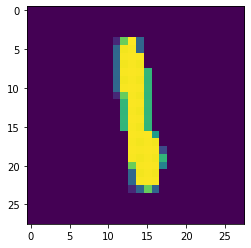

In [10]:
import matplotlib.pyplot as plt
print(x_train[0].shape)
print(len(x_train))
print(len(x_test))
plt.imshow(x_train[200])
plt.show()

In [11]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

In [12]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2687 - accuracy: 0.9209
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1084 - accuracy: 0.9658
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0729 - accuracy: 0.9770


In [13]:
val_loss, val_acc=model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0811 - accuracy: 0.9749


In [14]:
model.save('epic_num_reader.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: epic_num_reader.model\assets


In [16]:
new_model=tf.keras.models.load_model('epic_num_reader.model')

In [18]:
predictions=new_model.predict(x_test)

In [22]:
import numpy as np
print(np.argmax(predictions[5]))

1


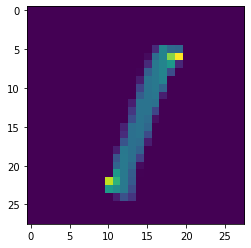

In [21]:
plt.imshow(x_test[5])
plt.show()